In [17]:
import numpy as np
from keras.src.utils import image_dataset_from_directory
from keras import models
from keras import layers

train_data = image_dataset_from_directory(
    './Lab3/train',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(150, 150),
    shuffle=True,
)

val_data = image_dataset_from_directory(
    './Lab3/validation',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(150, 150),
    shuffle=True,
)

test_data = image_dataset_from_directory(
    './Lab3/test',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=1,
    image_size=(150, 150),
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [34]:
model = models.Sequential()
model.add(layers.RandomFlip("horizontal", input_shape=(150, 150, 3)))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.1))
model.add(layers.RandomTranslation(0.1, 0.1))
model.add(layers.RandomContrast(0.1))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_19 (RandomFlip)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_19              │ (None, 150, 150, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_19 (RandomZoom)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_19           │ (None, 150, 150, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_19              │ (None, 150, 150, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_23 (Rescaling)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    batch_size=20
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 330ms/step - accuracy: 0.5106 - loss: 0.7064 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 293ms/step - accuracy: 0.5287 - loss: 0.6926 - val_accuracy: 0.5130 - val_loss: 0.6901
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 295ms/step - accuracy: 0.5401 - loss: 0.6907 - val_accuracy: 0.5430 - val_loss: 0.6963
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 300ms/step - accuracy: 0.5898 - loss: 0.6756 - val_accuracy: 0.6100 - val_loss: 0.6606
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 293ms/step - accuracy: 0.6335 - loss: 0.6568 - val_accuracy: 0.6040 - val_loss: 0.6507
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - accuracy: 0.6592 - loss: 0.6385 - val_accuracy: 0.6580 - val_loss: 0.6290
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 306ms/step - accuracy: 0.6729 - loss: 0.6138 - val_accuracy: 0.6590 - val_loss: 0.6158
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.6749 - loss: 0

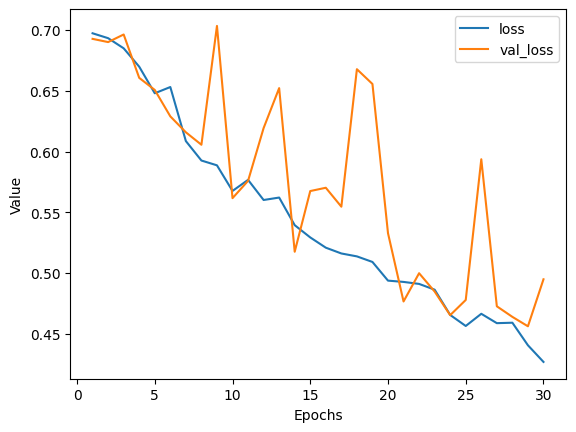

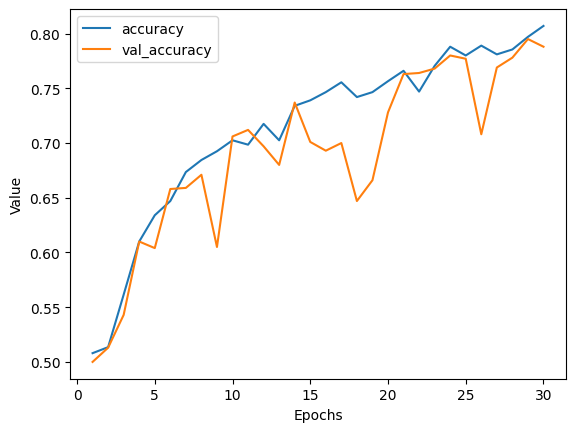

In [37]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='accuracy')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()


In [30]:
model = models.Sequential()
model.add(layers.RandomFlip("horizontal", input_shape=(150, 150, 3)))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.1))
model.add(layers.RandomTranslation(0.1, 0.1))
model.add(layers.RandomContrast(0.1))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 150, 150, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_1            │ (None, 150, 150, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (None, 150, 150, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    batch_size=20
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - accuracy: 0.5060 - loss: 0.7127 - val_accuracy: 0.5010 - val_loss: 0.6921
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.5224 - loss: 0.7015 - val_accuracy: 0.5950 - val_loss: 0.6784
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 282ms/step - accuracy: 0.5536 - loss: 0.6830 - val_accuracy: 0.5840 - val_loss: 0.6615
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 284ms/step - accuracy: 0.5819 - loss: 0.6691 - val_accuracy: 0.6210 - val_loss: 0.6456
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.6373 - loss: 0.6389 - val_accuracy: 0.6260 - val_loss: 0.6418
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.6629 - loss: 0.6063 - val_accuracy: 0.6530 - val_loss: 0.6085
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 293ms/step - accuracy: 0.6736 - loss: 0.6002 - val_accuracy: 0.6110 - val_loss: 0.6880
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.7133 - loss: 0

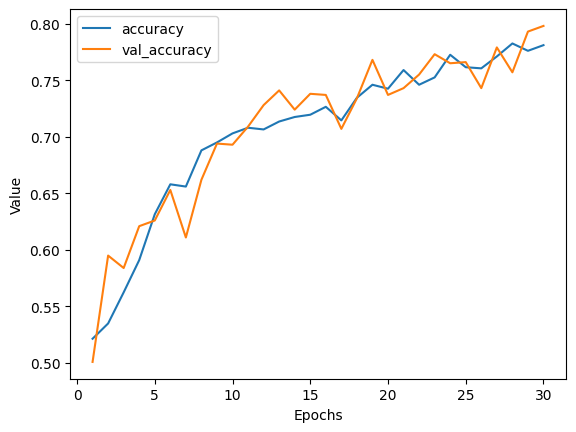

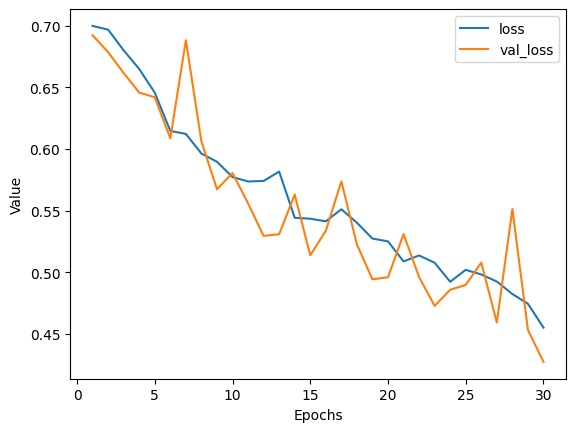

In [32]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='accuracy')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()
